In [44]:
from sklearn.datasets import load_files

uza_train = load_files('.\\uza\\train', encoding='utf-8')
uza_test = load_files('.\\uza\\test', encoding='utf-8')

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 40000
embedding_dim = 200
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, filters='!"“–”—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\r\n', oov_token=oov_tok)
tokenizer.fit_on_texts(uza_train.data)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(uza_train.data)
test_sequences = tokenizer.texts_to_sequences(uza_test.data)

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [47]:
print(len(word_index))
print(word_index['сўз'])

from gensim.models import Word2Vec
model = Word2Vec.load("uza_word2vec.model")
vocab = model.wv.vocab

55012
321


In [1]:
import numpy as np

vocab_size=len(word_index)
embeddings_index = {};

# with open('glove/glove.6B.100d.txt') as f:
#     for line in f:
#         values = line.split();
#         word = values[0];
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():    
    
    if word in vocab:
        embeddings_matrix[i] = model.wv[word]
    else:
        embeddings_matrix[i] = [0]*200;

NameError: name 'word_index' is not defined

In [49]:
print(len(embeddings_matrix))

55013


In [50]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 200)          11002600  
_________________________________________________________________
dropout_4 (Dropout)          (None, 150, 200)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 146, 64)           64064     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 36, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 11,100,338
Trainable params: 97,738
Non-trainable params: 11,002,600
_____________________________________

In [51]:
num_epochs = 10
history = model.fit(train_padded, uza_train.target, epochs=num_epochs, validation_data=(test_padded, uza_test.target), verbose=2)

Train on 1385 samples, validate on 462 samples
Epoch 1/10
1385/1385 - 7s - loss: 1.9893 - accuracy: 0.3437 - val_loss: 1.6772 - val_accuracy: 0.4632
Epoch 2/10
1385/1385 - 4s - loss: 1.4223 - accuracy: 0.5430 - val_loss: 1.3721 - val_accuracy: 0.5281
Epoch 3/10
1385/1385 - 5s - loss: 1.1692 - accuracy: 0.6332 - val_loss: 1.3123 - val_accuracy: 0.5541
Epoch 4/10
1385/1385 - 6s - loss: 1.0258 - accuracy: 0.6635 - val_loss: 1.1812 - val_accuracy: 0.5823
Epoch 5/10
1385/1385 - 5s - loss: 0.9547 - accuracy: 0.6946 - val_loss: 1.1393 - val_accuracy: 0.6277
Epoch 6/10
1385/1385 - 5s - loss: 0.8289 - accuracy: 0.7249 - val_loss: 1.1239 - val_accuracy: 0.6277
Epoch 7/10
1385/1385 - 4s - loss: 0.7080 - accuracy: 0.7877 - val_loss: 1.1069 - val_accuracy: 0.6277
Epoch 8/10
1385/1385 - 4s - loss: 0.6144 - accuracy: 0.8130 - val_loss: 1.0371 - val_accuracy: 0.6537
Epoch 9/10
1385/1385 - 4s - loss: 0.5313 - accuracy: 0.8426 - val_loss: 1.0299 - val_accuracy: 0.6753
Epoch 10/10
1385/1385 - 4s - loss: 

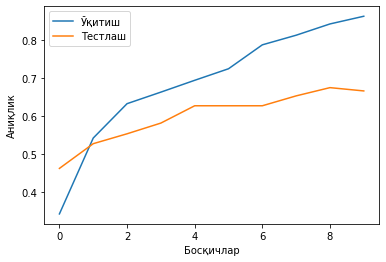

In [52]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Босқичлар")
    plt.ylabel("Аниқлик")
    plt.legend(['Ўқитиш', 'Тестлаш'])
    plt.show()


plot_graphs(history, "accuracy")